In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

NCdata = pd.read_csv(r'C:\Users\maria\OneDrive\Documents\RESEARCH\Data files\ruralurban_driving summary_NC.csv')
# 7 rural, 32 urban (18% rural)

maindata = pd.read_csv(r'C:\Users\maria\OneDrive\Documents\RESEARCH\Data files\ruralurban_driving summary_main.csv')
# 8 rural, 238 urban (3% rural)

data = pd.read_csv(r'C:\Users\maria\OneDrive\Documents\RESEARCH\Data files\ruralurban_driving summary_overall.csv')
# 15 rural, 270 urban (5% rural)

In [ ]:
def RUplot (fname, dataset, plot = 'box', y_limit = None, size = (5, 5), showmean = True, bins = 15, logscale = False):
    '''
    This function generates a Seaborn boxplots for the desired dataset and feature. Arguments are:
    
    fname (str) = column name of the feature in the three datasets
    dataset (dataframe) = variable name of desired driving dataset
    plot (type of plot, optional) = default is boxplot, but can specify as "violin" or "hist"
    y_limit (tuple, optional) = lower and upper limits for the y-axis of the plots
    size (tuple, optional) = width and height of the overall plot
    showmean (bool, optional) = whether or not to show the mean of each dataset (as X) on the plots
    bins (int, optional) = only used for the histogram plot
    logscale (bool, optional) = default is False; if set as True, the y-scale of the plot will be a log scale
   
    '''
        
    fig, ax = plt.subplots(figsize = size)
    sns.set_palette("Set2")
    
    if y_limit is not None:
        plt.setp(ax, ylim = y_limit)
        
    if logscale is True:
        ax.set_yscale('log')
        
    try:
        
        if dataset is maindata:        ## this if/else block is used to provide a datasetname
            datasetname = 'main'         ## because only three driving datasets are used,
        elif dataset is NCdata:        ## and thus it is easy and inexpensive to implement;
            datasetname = 'NC'         ## however, if more datasets were required, it would
        elif dataset is data:         ## be desirable to get the variable name of fname as a string
            datasetname = 'combined'   ## and set this as datasetname, e.g. using locals().items()

        if plot == 'box': 
            sns.boxplot(data = dataset, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}).set(title=f"{string.capwords(fname)} ({datasetname})")

        elif plot == 'violin':
            sns.violinplot(data = dataset, x = "overall RU code", y = fname, showmeans = showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}).set(title=f"{string.capwords(fname)} ({datasetname})")

        elif plot == 'hist':
            sns.histplot(data = dataset, x = fname, bins=bins, hue = 'overall RU code', multiple = 'dodge').set(title=f"{string.capwords(fname)} ({datasetname})")
    
    except:
        print("Error: Please check that all arguments are inputted correctly for this function.")
        

In [3]:
def RUplot_comparative (fname, plot = 'box', y_limit = None, size = (15, 5), showmean = True, bins = 15, logscale = False):
    '''
    This function generates a set of three Seaborn boxplots, one for each set of data used in this project, for the desired
    feature. Arguments required are:
    
    fname (str) = column name of the feature in the three datasets
    plot (type of plot, optional) = default is boxplot, but can specify as "violin" or "hist"
    y_limit (tuple, optional) = lower and upper limits for the y-axis of the plots
    size (tuple, optional) = width and height of the overall plot
    showmean (bool, optional) = whether or not to show the mean of each dataset (as X) on the plots
    bins (int, optional) = only used for the histogram plot
    logscale (bool, optional) = default is False; if set as True, the y-scale of all plots will be a log scale
    '''
        
    fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 5))
    sns.set_palette("Set2")
    
    if y_limit is not None:
        plt.setp(axs, ylim = y_limit)

    if logscale is True:
        axs[0].set_yscale('log')
        axs[1].set_yscale('log')
        axs[2].set_yscale('log')
        
    try:
        
        if plot == 'box': 
            sns.boxplot(data = NCdata, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[0]).set(title=f"{string.capwords(fname)} (NC)")

            sns.boxplot(data = maindata, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[1]).set(title=f"{string.capwords(fname)} (main)")

            sns.boxplot(data = data, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[2]).set(title=f"{string.capwords(fname)} (combined)")

        elif plot == 'violin':
            sns.violinplot(data = NCdata, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[0]).set(title=f"{string.capwords(fname)} (NC)")

            sns.violinplot(data = maindata, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[1]).set(title=f"{string.capwords(fname)} (main)")

            sns.violinplot(data = data, x = "overall RU code", y = fname, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[2]).set(title=f"{string.capwords(fname)} (combined)")

        elif plot == 'hist':
            sns.histplot(data=NCdata, hue="overall RU code", x=fname, bins=bins, multiple='dodge', ax=axs[0]).set(title=f"{string.capwords(fname)} (NC)")

            sns.histplot(data=maindata, hue="overall RU code", x=fname, bins=bins, multiple='dodge', ax=axs[1]).set(title=f"{string.capwords(fname)} (main)")

            sns.histplot(data=data, hue="overall RU code", x=fname, bins=bins, multiple='dodge', ax=axs[2]).set(title=f"{string.capwords(fname)} (combined)")
    
    except:
        print("Error: Please check that all arguments are inputted correctly for this function.")

In [11]:
def RUplot_multiplefeatures (*fname, dataset, plot = 'box', y_limit = None, size = None, showmean = True, bins = 15, logscale = True):
    '''
    This function generates a set of Seaborn boxplots, one for each set of data used in this project, for the desired
    feature. Arguments required are:
    
    fname (str) = column names of the desired features, inputted as strings seperated by commas
    dataset (dataframe) = variable name of desired driving dataset
    plot (type of plot, optional) = default is boxplot, but can specify as "violin" or "hist"
    y_limit (tuple, optional) = lower and upper limits for the y-axis of the plots
    size (tuple, optional) = width and height of the overall plot
    showmean (bool, optional) = whether or not to show the mean of each dataset (as X) on the plots
    bins (int, optional) = only used for the histogram plot

    Another functionality is the ability to set the y-scale of a specific plot to be a log scale, simply by including
    "/log" at the end of the feature name.
    '''


    ## determines no. rows/cols needed to create the cleanest plot if 2+ features desired (the program attempts
    ## to create the plot so that no subplots are blank, but sets max no. cols = 5 for readability of plots)

    if len(fname) == 1:
        no_rows = 1
        no_cols = 1

    elif len(fname) > 1:
        for no_cols in reversed(range (2, 6)):
            if len(fname) % no_cols == 0:        ## if no. features are divisible by a number between 2-5,
                no_rows = len(fname)//no_cols    ## let's make that number = no. columns
                break

        if ('no_rows' not in vars()) and ('no_rows' not in globals()): ## otherwise, set no. columns = four
            no_cols = 4
            no_rows = len(fname)//no_cols + 1

    ## creates the set of subplots, accounting for user input of size and/or y_limit

    if size is None:
        size = (5*no_cols, 5*no_rows)

    fig, axs = plt.subplots(ncols = no_cols, nrows = no_rows, figsize = size, squeeze = False)
    sns.set_palette("Set2")

    if y_limit is not None:
        plt.setp(axs, ylim = y_limit)


    ## prepares to plot by setting dataset name required 

    if dataset is maindata:        ## this if/else block is used to provide a datasetname
        datasetname = 'main'        ## because only three driving datasets are used,
    elif dataset is NCdata:        ## and thus it is easy and inexpensive to implement;
        datasetname = 'NC'         ## however, if more datasets were required, it would
    elif dataset is data:         ## be desirable to get the variable name of fname as a string
        datasetname = 'combined'   ## and set this as datasetname, e.g. using locals().items()


    ## creates the subplots

    i = 0  # row indexer
    j = 0  # column indexer

    for feature in fname:
        axs[i, j].set(xlabel = None) ## removes 'overall RU code' label since this is relatively self-explanatory
                                          ## and will clutter the grid of plots
        if (str(feature)[-4:] == '/log'):
            axs[i, j].set_yscale('log')
            feature = str(feature)[:-4]

        if plot == 'box':
            sns.boxplot(data = dataset, x = "overall RU code", y = feature, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[i, j]).set(title=f"{string.capwords(feature)} ({datasetname})")

        elif plot == 'violin':
            sns.violinplot(data = dataset, x = "overall RU code", y = feature, showmeans=showmean, 
            meanprops={"marker":"x", "markeredgecolor": "black", "markersize":"10"}, ax = axs[i, j]).set(title=f"{string.capwords(feature)} ({datasetname})")

        elif plot == 'hist':
            sns.histplot(data = dataset, hue = "overall RU code", x = feature, bins = bins, multiple = 'dodge', 
                            ax = axs[i, j]).set(title=f"{string.capwords(feature)} ({datasetname})")

        j += 1    ## increase column indexer by one

        if j == no_cols:  ## if column indexer is past the last column, 
            j = 0         ## move column indexer back to 0
            i += 1        ## and increase row indexer by one

        
    while (j != 0) and (j < no_cols): ## if there are empty subplots after plotting all features
        axs[i, j].remove()            ## remove all empty subplots
        j += 1

These functions were then used to plot a variety of different graphs to visualize the driving data, and specifically the correlations it may have to location of residence (i.e. whether there is a difference between rural and urban participants in some driving behaviour/attribute). RUplot_comparative was used to compare plots from the NC, STL, and overall datasets to determine if there was any significant differences between the NC and STL datasets (e.g. even though they share some attributes, the data for these attributes may have been collected in different ways, thus making them uncomparable and indicating that they should not be combined in the overall dataset). RUplot was used to create individual plots as desired (e.g. for attributes that were not shared between datasets), and RUplot_multiplefeatures was used to create multiple plots for the same feature and dataset as desired. Plots were also seperately made to compare the coding types used in this project (RUCA_ru, other_ru, and overall RU code) but without many significant differences observed.

For instance:

### Final feature selection (FS)

These plots are used to visualize specifically the features chosen for use in the machine learning models, from the feature selection performed in part <7> of this project.

                                          Feature set after preliminary FS:


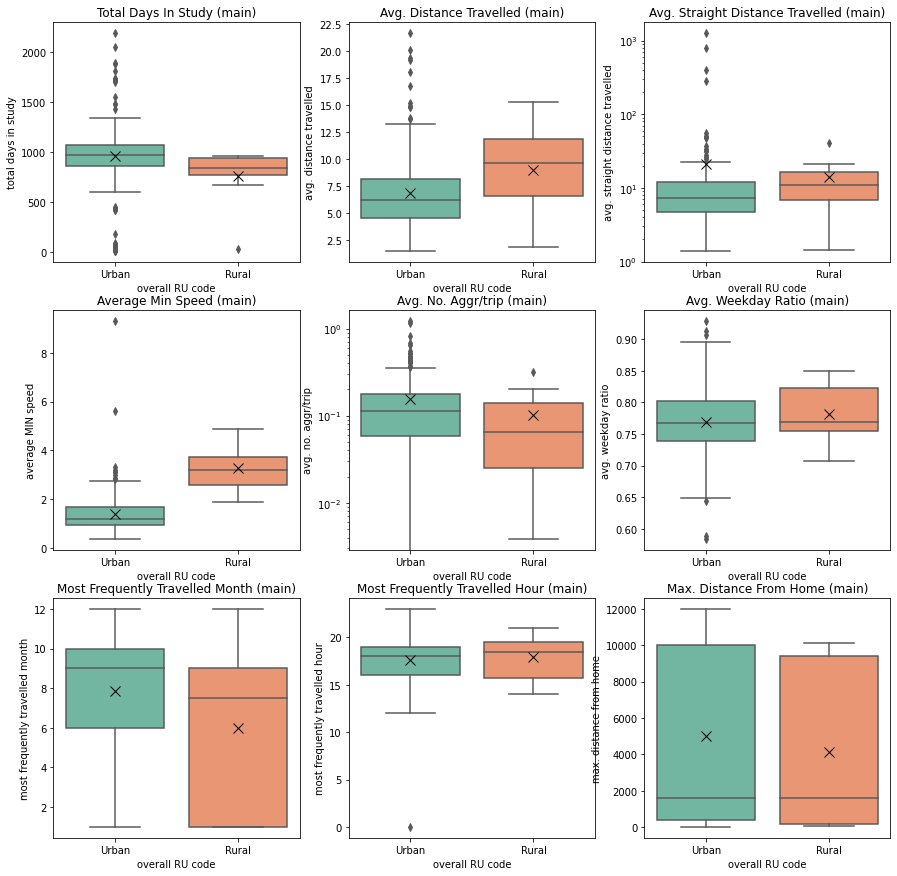

In [22]:
print('\033[1m' + '                                          Feature set after preliminary FS:')

RUplot_multiplefeatures("total days in study","avg. distance travelled", "avg. straight distance travelled/log", 
                        "average MIN speed", "avg. no. aggr/trip/log", "avg. weekday ratio", 
                        "most frequently travelled month", "most frequently travelled hour","max. distance from home", 
                        plot = 'box', dataset = maindata)

                                                              Final feature set:


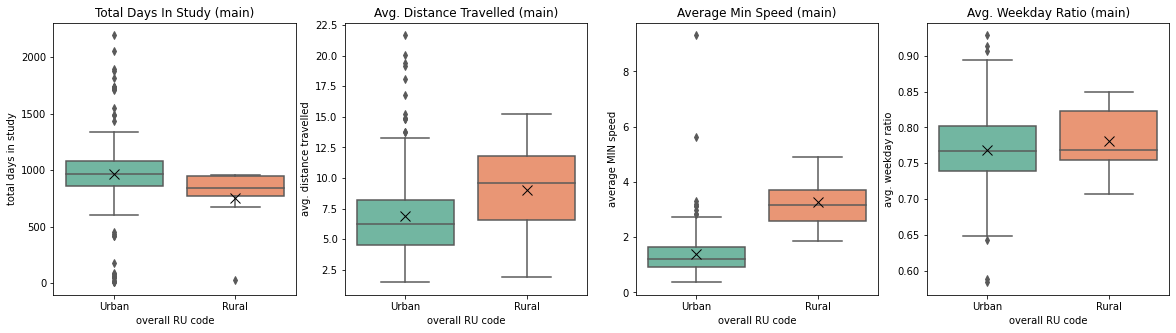

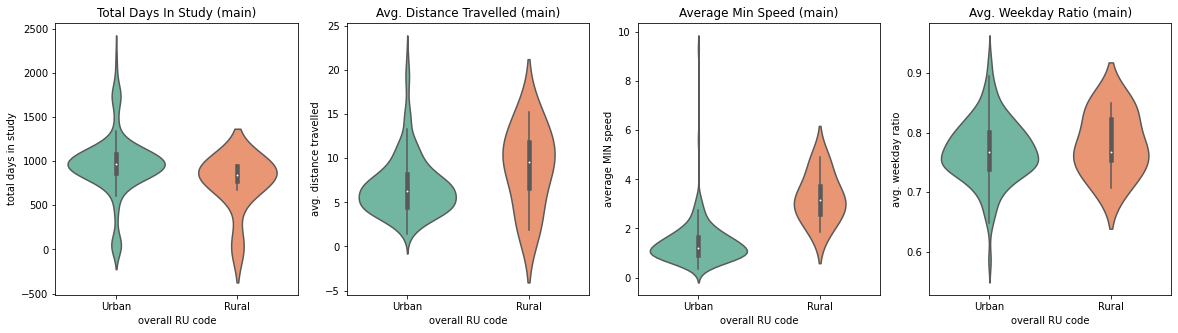

In [33]:
print('\033[1m' + '                                                              Final feature set:')

RUplot_multiplefeatures("total days in study", "avg. distance travelled", "average MIN speed", "avg. weekday ratio", 
                        plot = 'box', dataset = maindata)
RUplot_multiplefeatures("total days in study", "avg. distance travelled", "average MIN speed", "avg. weekday ratio", 
                        plot = 'violin', dataset = maindata)